## TO DEVELOP A MODEL FOR PREDICTING FRADULENT TRANSACTION 

### IMPORTING NECESSARY LIBRARY AND READING THE CSV FILE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv('Fraud.csv')
data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### BASIC CHECKS

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# INFORMATION ABOUT THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# CHECKING FOR NULL VALUES
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


->  the dataset doesn't contain any null values

### EXPLORATORY DATA ANALYSIS

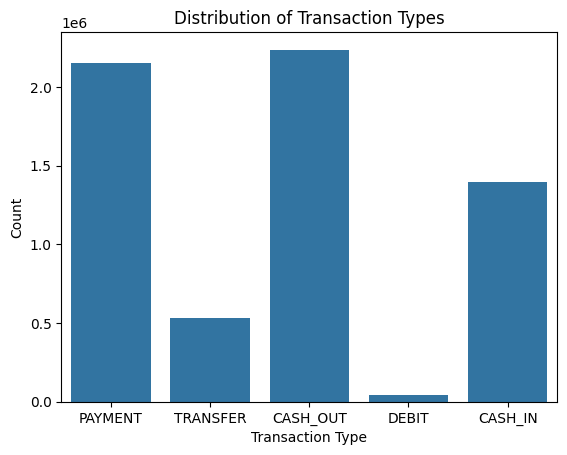

In [7]:
# distribution of transaction types
sns.countplot(x='type',data=data)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

-> The most frequent transaction type is CASH_OUT, followed by PAYMENT and then TRANSFER.


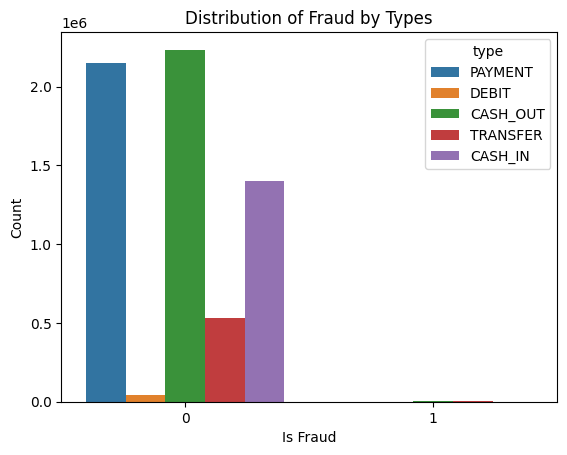

In [9]:
# Distribution of Fraud by transaction types
sns.countplot(hue='type',x='isFraud',data=data)
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraud by Types')
plt.show()

-> The most frequent transaction type associated with not fraud is CASH_OUT, followed by TRANSFER.

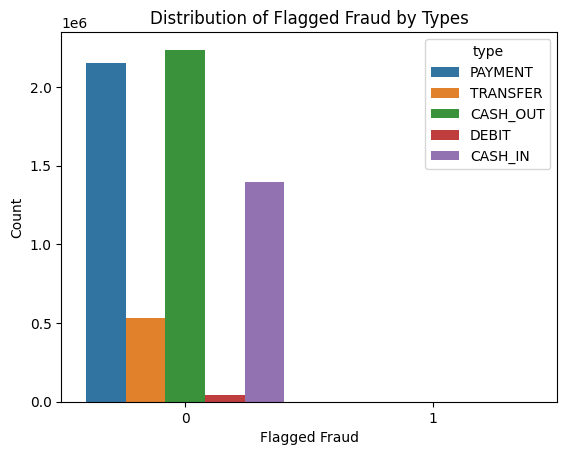

In [10]:
# Distribution of notFraud by transaction types
sns.countplot(hue='type',x='isFlaggedFraud',data=data)
plt.xlabel('Flagged Fraud')
plt.ylabel('Count')
plt.title('Distribution of Flagged Fraud by Types')
plt.show()

-> The most frequent transaction type associated with not Flagged fraud is CASH_OUT, followed by TRANSFER.

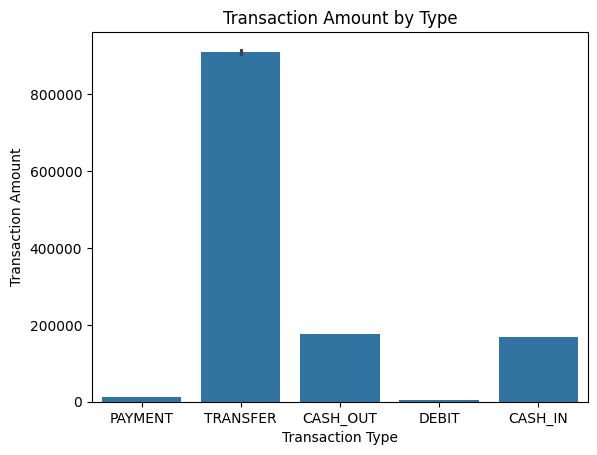

In [11]:
# Distribution of amount by transaction types
sns.barplot(x='type', y='amount',data=data)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

 -> CASH_OUT and TRANSFER transactions are disproportionately associated with fraud While CASH_OUT transactions are the most common
 
 -> CASH_OUT and TRANSFER appear to involve larger average transaction amounts compared to other types like PAYMENT or DEBIT.


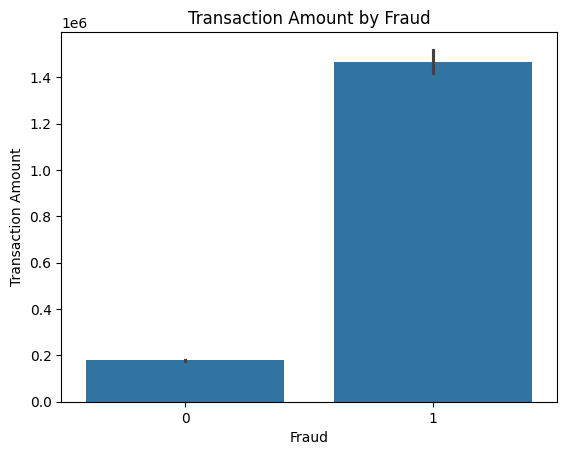

In [12]:
# Distribution of amount by fraud
sns.barplot(x='isFraud', y='amount',data=data)
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Fraud')
plt.show()

-> Fraudulent transactions tend to have significantly higher average amounts than non-fraudulent transactions.

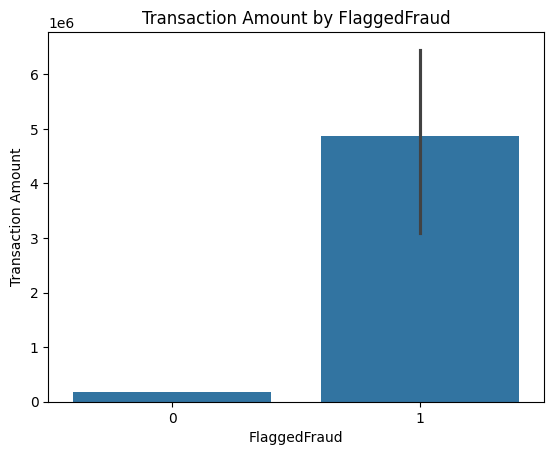

In [13]:
# Distribution of amount by flagged fraud
sns.barplot(x='isFlaggedFraud', y='amount',data=data)
plt.xlabel('FlaggedFraud')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by FlaggedFraud')
plt.show()

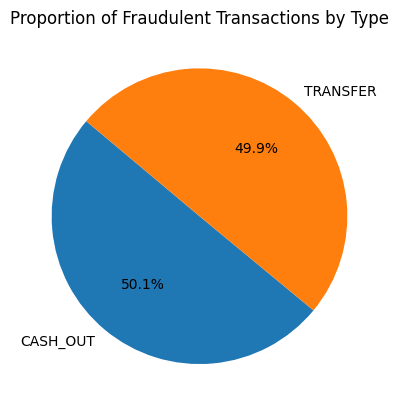

In [14]:
# fradulent transaction proportion
fraud=data[data['isFraud']==1]['type'].value_counts()
plt.pie(fraud, labels=fraud.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent Transactions by Type')
plt.show()

-> The largest proportion of fraudulent transactions are of the 'CASH_OUT' and 'TRANSFER' type.

-> Fraudulent activity in 'PAYMENT', 'DEBIT', and 'CASH_IN' is significantly lower compared to 'TRANSFER' and 'CASH_OUT'.


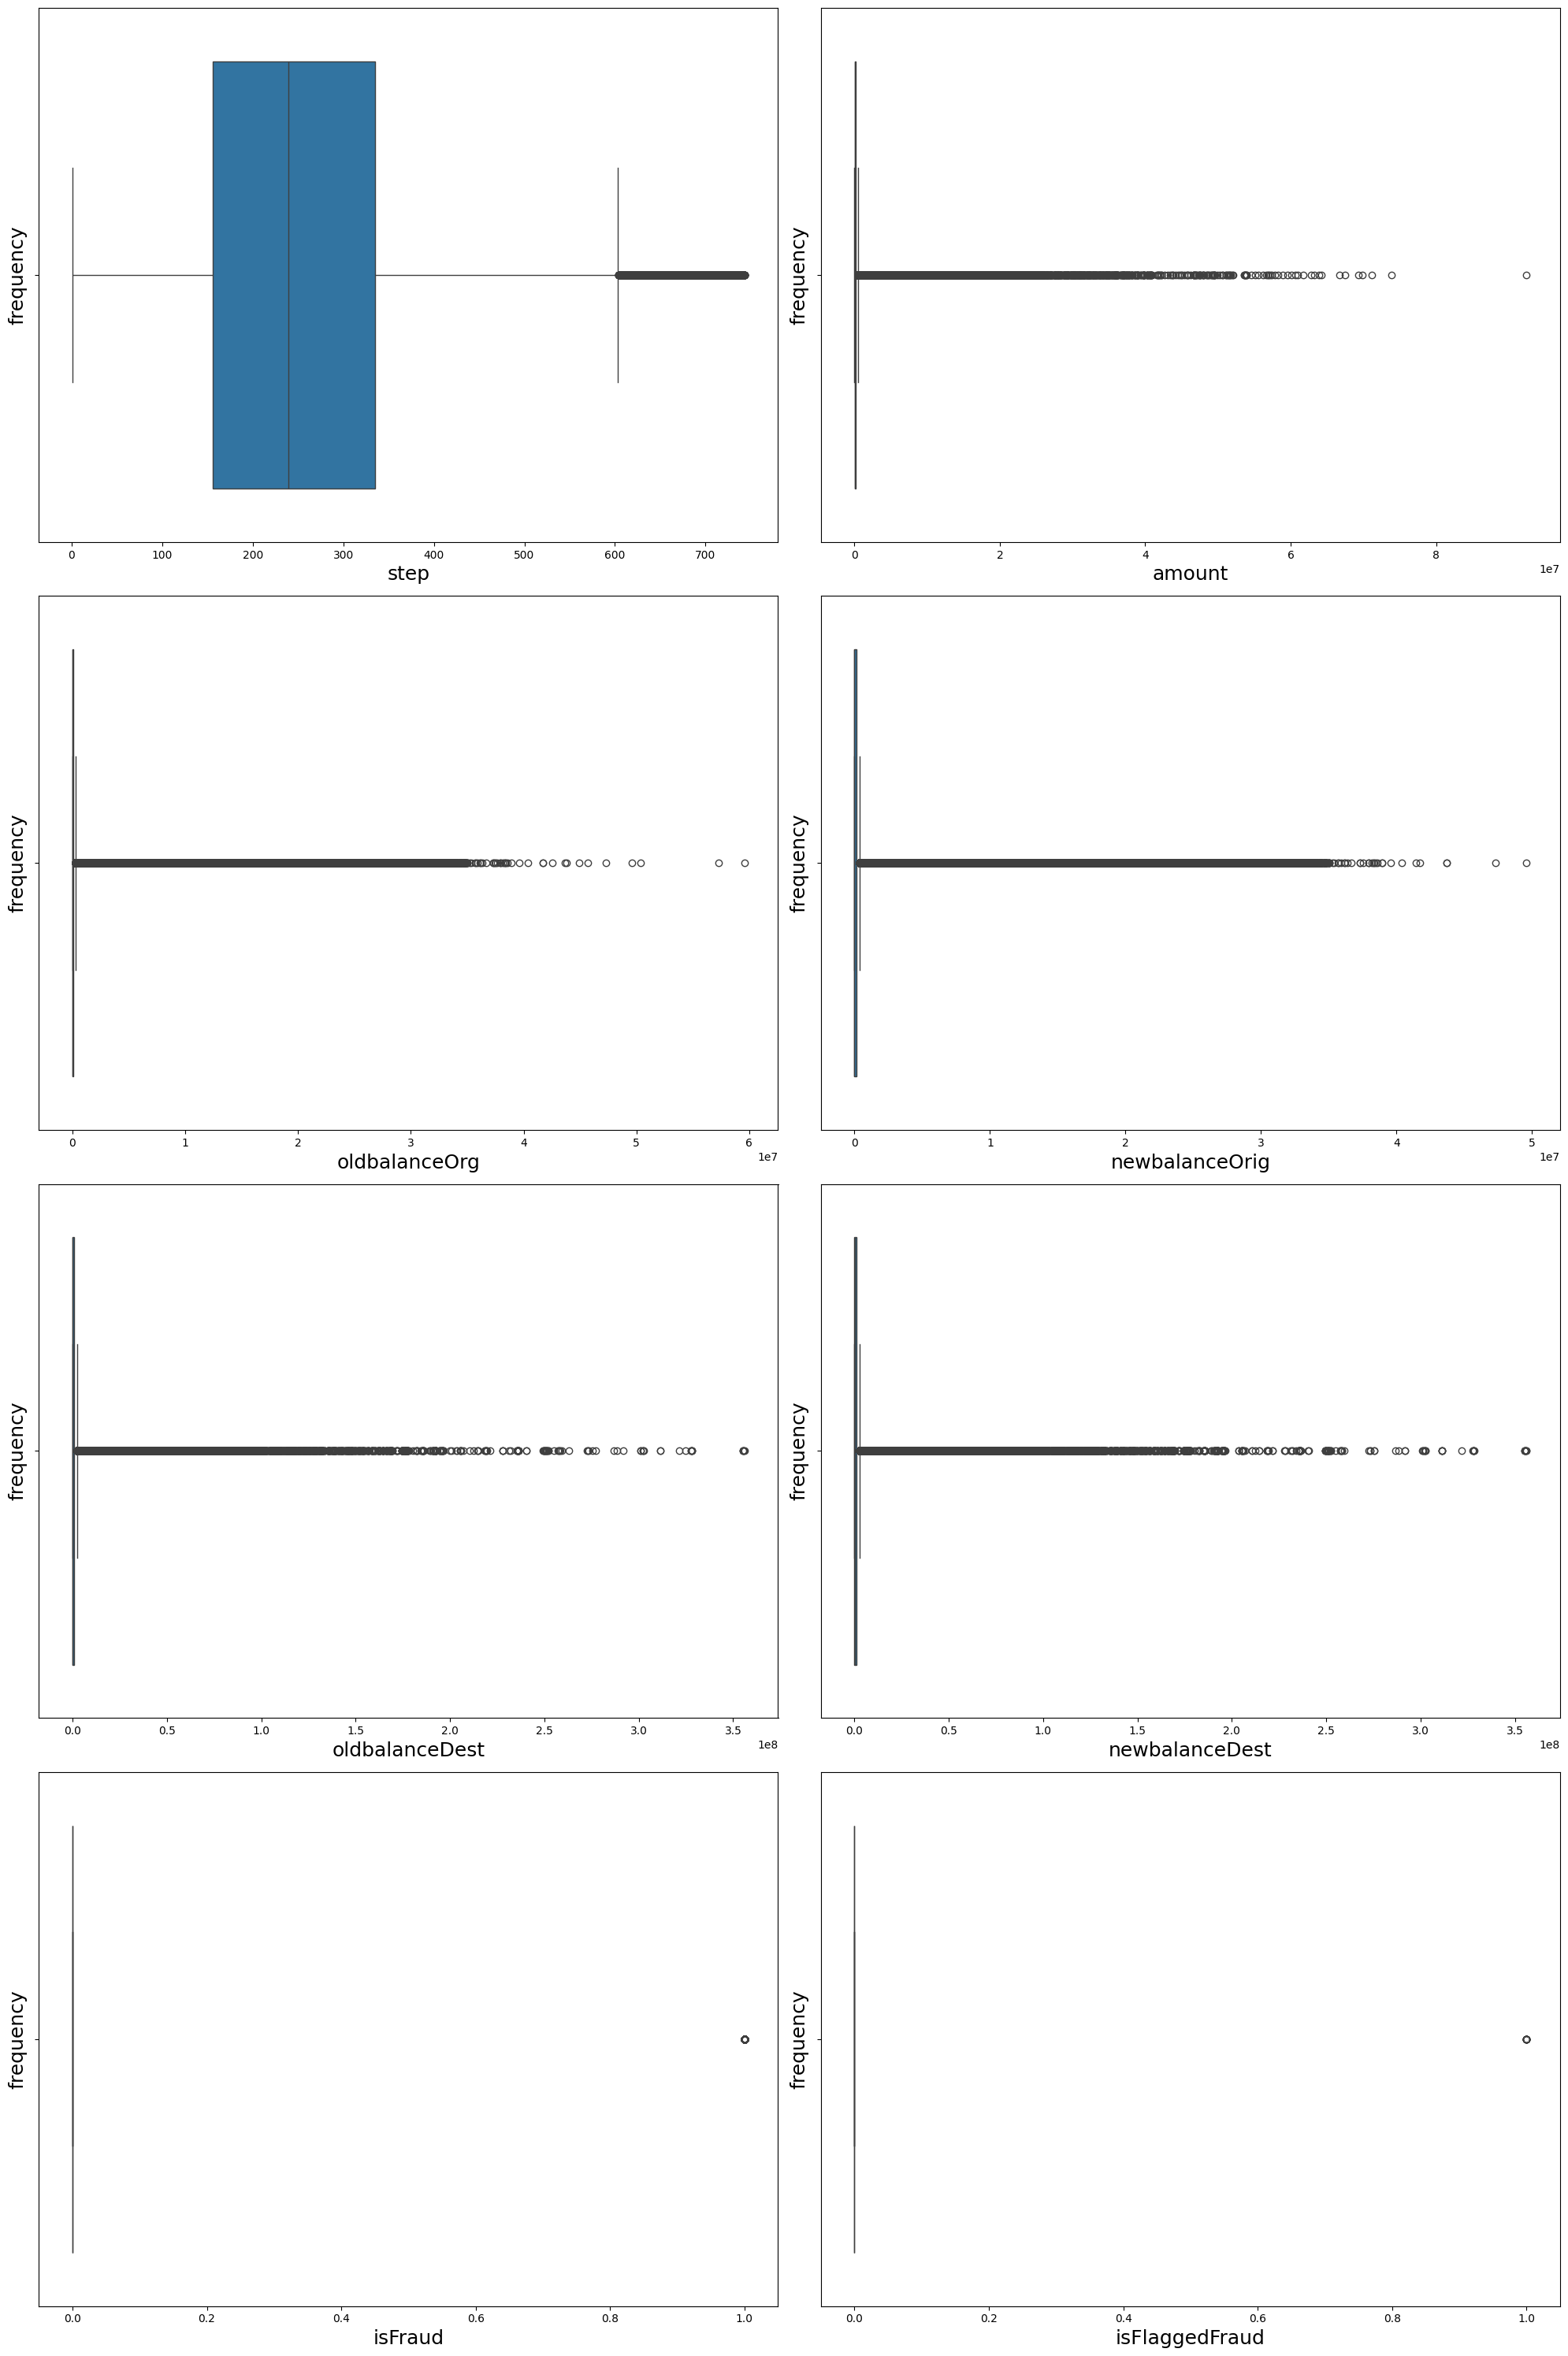

In [15]:
# Boxplot 
plt.figure(figsize=(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'type' and i != 'nameOrig' and i!= 'nameDest' :
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('frequency',fontsize = 18)
        plotnumber += 1
plt.tight_layout()

In [16]:
#checking for outliers
numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers using the IQR method
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) |
                (data[col] > (Q3 + 1.5 * IQR)))

    # Count the number of outliers for the current column
    num_outliers = outliers.sum()

    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'oldbalanceOrg': 1112507
Number of outliers in column 'newbalanceOrig': 1053391
Number of outliers in column 'oldbalanceDest': 786135
Number of outliers in column 'newbalanceDest': 738527


-> Removing outliers from every column would  potentially remove crucial data points that might reveal subtle patterns or hidden details about fraudulent transactions.

-> The presence of outliers in multiple features could be indicative of the underlying nature of fraudulent activity, and discarding them might obscure important insights.

### DATA PREPROCESSING / FEATURE SELECTION

#### 1) DROPING  UNWANTED COLUMNS

In [17]:
# These columns doesn't have any imapct on the output 
data.drop(['nameOrig','nameDest',],axis=1,inplace=True)

#### 2) DATA TYPE CONVERSION

In [18]:
# changing the data type using map 
data.type=data.type.map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})
data.type.unique()

array([2, 4, 1, 5, 3])

#### 3) SCALING

In [20]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler on the numerical features
scaler.fit(data[numerical_columns])
# Transform the numerical features using the fitted scaler
scaled_features = scaler.transform(data[numerical_columns])
# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=numerical_columns, index = data.index)
# Concatenate the scaled features with the binary columns
data = pd.concat([scaled_data, data[['type', 'isFraud', 'isFlaggedFraud']]], axis=1)
data


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud,isFlaggedFraud
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,2,0,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,2,0,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,4,1,0
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,1,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,2,0,0
...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,1,1,0
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,4,1,0
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,1,1,0
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,4,1,0


#### 4) CORRELATION

In [21]:
cor=data.corr()
cor

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.012627,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.198987,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.260418,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.270669,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,0.066255,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.079111,0.000535,-0.000529
type,0.012627,0.198987,0.260418,0.270669,0.066255,0.079111,1.000000,0.016171,0.003144
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.016171,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.003144,0.044109,1.000000


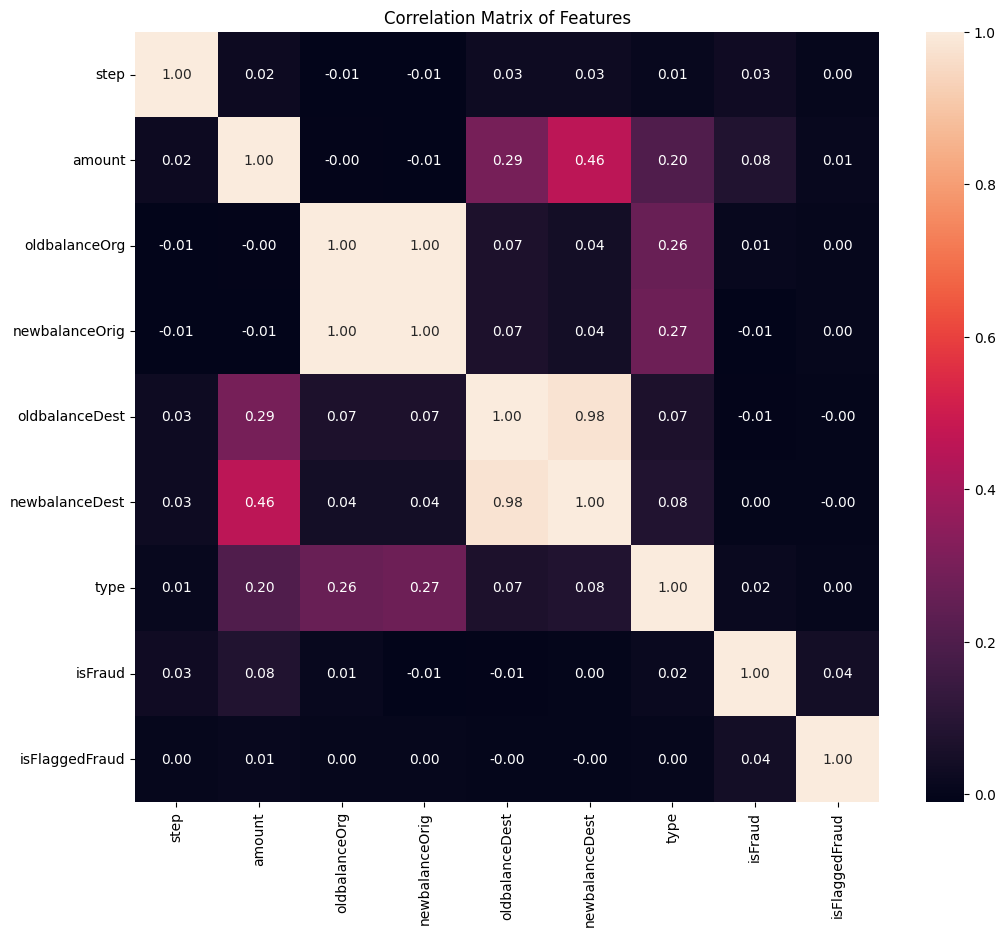

In [22]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [23]:
# dropping highly correlated columns
data.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)


-> 'oldbalanceOrg' and 'newbalanceOrig' are highly correlated and 'oldbalanceDest' and 'newbalanceDest' are highly correlated, according to the heatmap.

### SAVING DATA TO PREPROCESSED DATA

In [25]:
data.to_csv('Preprocessed_data.csv')
preprocessed_data=pd.read_csv('Preprocessed_data.csv')
preprocessed_data

,Unnamed: 0,step,amount,oldbalanceOrg,oldbalanceDest,type,isFraud,isFlaggedFraud
0,0,-1.703042,-0.281560,-0.229810,-0.323814,2,0,0
1,1,-1.703042,-0.294767,-0.281359,-0.323814,2,0,0
2,2,-1.703042,-0.297555,-0.288654,-0.323814,4,1,0
3,3,-1.703042,-0.297555,-0.288654,-0.317582,1,1,0
4,4,-1.703042,-0.278532,-0.274329,-0.323814,2,0,0
...,...,...,...,...,...,...,...,...
6362615,6362615,3.510123,0.264665,-0.171108,-0.323814,1,1,0
6362616,6362616,3.510123,10.153953,1.896491,-0.323814,4,1,0
6362617,6362617,3.510123,10.153953,1.896491,-0.303665,1,1,0
6362618,6362618,3.510123,1.109765,0.005581,-0.323814,4,1,0


### MODEL CREATION

### 1) LOGISTIC REGRESSION

In [26]:
# defining dependent and independent variable
X = preprocessed_data.drop('isFraud', axis=1)
y = preprocessed_data['isFraud']

In [27]:
preprocessed_data.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


-> the target column does not have balanced data so using SMOTE after spliting data for training and testing helps model to perform better

In [28]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
# Balacing the data using smote
from collections import Counter                   # importing counter to check count of each label
from imblearn.over_sampling import SMOTE
smote=SMOTE()                                     # object creation
print(Counter(y_train))                           # checking count for each class
X_sm,y_sm=smote.fit_resample(X_train,y_train)     # applying sampling on target variable
print(Counter(y_sm))                              # checking count after sampling for  each class

Counter({0: 5083503, 1: 6593})
Counter({0: 5083503, 1: 5083503})


In [30]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()                            # object creation
lr.fit(X_sm,y_sm)                                  # fitting data into model
y_predict=lr.predict(X_test)                       
y_predict                                          # predicted values

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# Evalauting the model for testing data
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270904
           1       0.01      0.68      0.02      1620

    accuracy                           0.91   1272524
   macro avg       0.50      0.79      0.48   1272524
weighted avg       1.00      0.91      0.95   1272524



In [32]:
# Accuracy of the model
LR=accuracy_score(y_test,y_predict)
LR

0.905758948357752

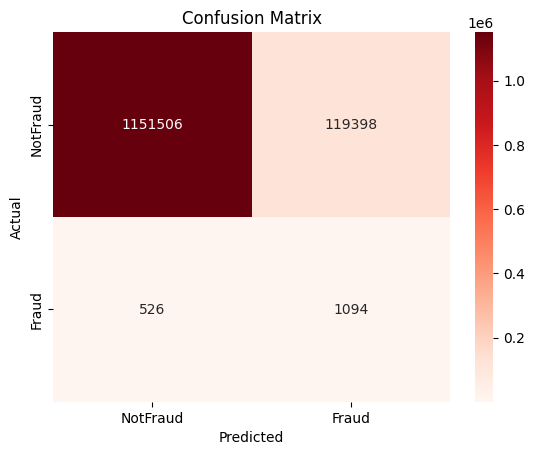

In [33]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['NotFraud', 'Fraud'], yticklabels=['NotFraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2) K NEAREST NEIGHBOURS

In [34]:
# defining dependent and independent variable
X = preprocessed_data.drop('isFraud', axis=1)
y = preprocessed_data['isFraud']

In [35]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [36]:
# Balacing the data using smote
from collections import Counter                        
from imblearn.over_sampling import SMOTE                
smote=SMOTE()                                          
print(Counter(y_train))                                
X_sm,y_sm=smote.fit_resample(X_train,y_train)           
print(Counter(y_sm))                                    

Counter({0: 5083503, 1: 6593})
Counter({0: 5083503, 1: 5083503})


In [37]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)               # object creation
knn.fit(X_sm, y_sm)                                     # fitting data into model
y_predict = knn.predict(X_test)                         # predicting of test data
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270904
           1       0.02      0.78      0.03      1620

    accuracy                           0.93   1272524
   macro avg       0.51      0.86      0.50   1272524
weighted avg       1.00      0.93      0.97   1272524



In [39]:
KNN=accuracy_score(y_test,y_predict)
KNN

0.93491124725349

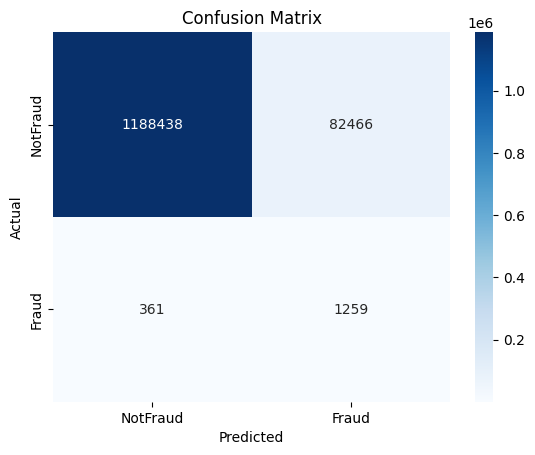

In [40]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NotFraud', 'Fraud'], yticklabels=['NotFraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3) DECISION TREE

In [41]:
# defining dependent and independent variable
X = preprocessed_data.drop('isFraud', axis=1)
y = preprocessed_data['isFraud']

In [42]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [43]:
# Balacing the data using smote
from collections import Counter               
from imblearn.over_sampling import SMOTE       
smote=SMOTE()
print(Counter(y_train))
X_sm,y_sm=smote.fit_resample(X_train,y_train)
print(Counter(y_sm))

Counter({0: 5083503, 1: 6593})
Counter({0: 5083503, 1: 5083503})


In [44]:
# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier   # importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()                       # object creation 
dt.fit(X_sm,y_sm)                                 # training the model
y_predict=dt.predict(X_test)
y_predict                                         # predicted values

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
 #predicting training data to check training performance
X_train_predict=dt.predict(X_sm)
print(X_train_predict)

[0 0 0 ... 1 1 1]


In [46]:
#predicting the model for training data
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_sm,X_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      1.00      1.00   5083503

    accuracy                           1.00  10167006
   macro avg       1.00      1.00      1.00  10167006
weighted avg       1.00      1.00      1.00  10167006



In [47]:
# Evalauting the model for testing data
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.30      0.88      0.45      1620

    accuracy                           1.00   1272524
   macro avg       0.65      0.94      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524



In [48]:
DT=accuracy_score(y_test,y_predict)
DT

0.997274707589012

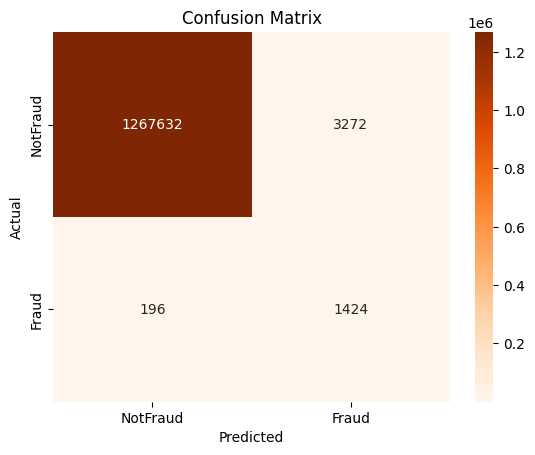

In [49]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['NotFraud', 'Fraud'], yticklabels=['NotFraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# comparing accuracy 
models = pd.DataFrame([LR,KNN,DT],
             index=['Logistic Regression','KNN','DT'],columns=['accuracy'])

models.sort_values('accuracy', ascending=False)

,accuracy
DT,0.997275
KNN,0.934911
Logistic Regression,0.905759


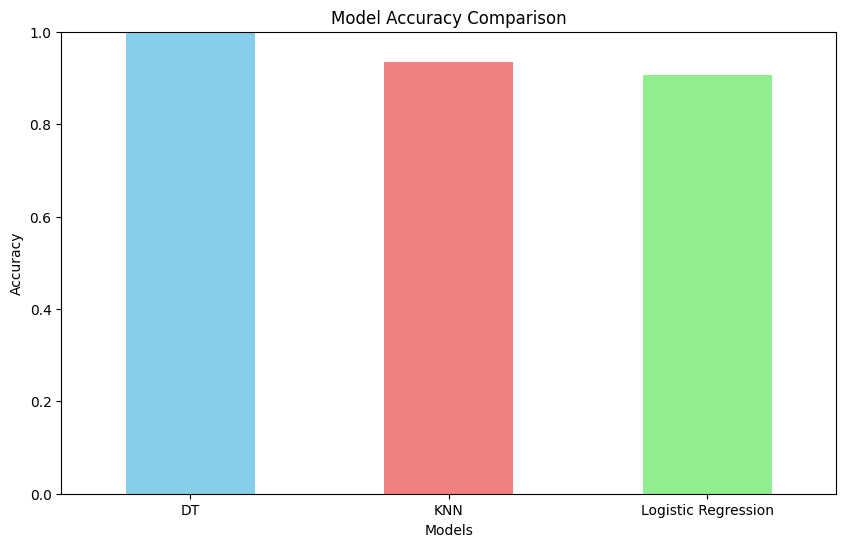


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270904
           1       0.01      0.68      0.02      1620

    accuracy                           0.91   1272524
   macro avg       0.50      0.79      0.48   1272524
weighted avg       1.00      0.91      0.95   1272524


Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270904
           1       0.02      0.78      0.03      1620

    accuracy                           0.93   1272524
   macro avg       0.51      0.86      0.50   1272524
weighted avg       1.00      0.93      0.97   1272524


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.30      0.88      0.45      1620

    accuracy                           1.00   1272524
   mac

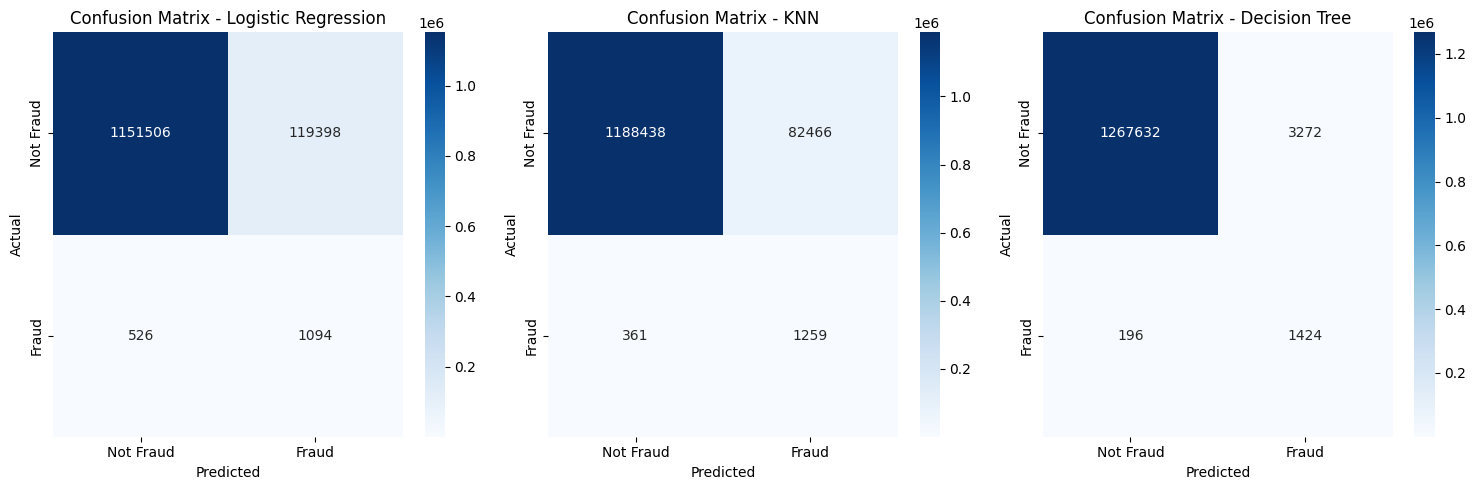

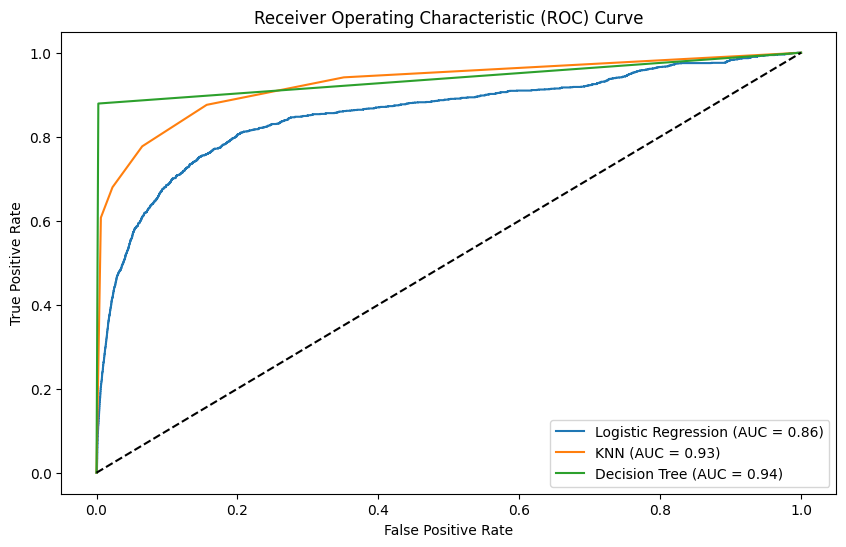

In [52]:
# Bar plot for model comparison
plt.figure(figsize=(10, 6))
models.accuracy.sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit for better visualization
plt.show()


# Detailed performance metrics
from sklearn.metrics import classification_report

models_to_evaluate = {
    'Logistic Regression': lr,
    'KNN': knn,
    'Decision Tree': dt
}

for model_name, model in models_to_evaluate.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(15, 5))

for i, (model_name, model) in enumerate(models_to_evaluate.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model_name, model in models_to_evaluate.items():
  y_pred_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### CONCLUSION

->  Among 3 models used " DECISION TREE" has highest accuracy for predicting fradulent transaction

->  Hyperparameter testing is not used for fine tunning because data set containing large volume of data because of high execution time